# 3. Importing Data from Databases
**Combine pandas with the powers of SQL to find out just how many problems New Yorkers have with their housing. This chapter features introductory SQL topics like WHERE clauses, aggregate functions, and basic joins.**

## Introduction to databases
In this chapter, you'll learn to build pipelines to relational databases, which underpin the information systems of many organizations.

### Relational Databases
Relational databases organize data about entities in tables, with rows representing instances of entities and columns of attributes. This probably sounds familiar -- data frames, flat files, and many Excel sheets arrange data similarly. Relational databases differ in that tables can be linked, or related, via unique record identifiers, or keys. Databases handle more data and support more simultaneous users than spreadsheets or flat files. They also offer more data quality controls, like enforcing column data types. And we interface with databases via a specific language: Structured Query Language, or SQL.

### Common Relational Databases
Common relational databases include Microsoft SQL Server, Oracle, PostgreSQL, and SQLite, which this course uses. Unlike the others, SQLite databases are stored as regular, self-contained computer files, just as CSVs and Excel files are, making them great for sharing data.

### Connecting to Databases
Reading data from a database is a two-step process. We first make a way to connect to a database then query it with SQL and pandas.

### Creating a Database Engine
To do this, we'll use the `SQLAlchemy` library, which has tools to work with many major relational databases. Specifically, we'll use `SQLAlchemy`'s `create_engine()` function. Create engine takes a string URL to a database and makes an engine object that manages database connections. URLs follow a pattern that varies slightly depending on the database. For SQLite, the pattern is `sqlite:///filename.db`.

### Querying Databases
Once we create the database engine, we can pull data with pandas' read SQL function. 
```python
pd.read_sql(query, engine)
```
Read SQL needs two arguments. The first is a string of either a SQL query, or, to load a whole table, just the table name. The second argument is a way to connect to the database. We'll supply the engine we made here.

### SQL Review: SELECT
Let's take a minute to review SQL select statements, which are used to query databases. The basic syntax is `SELECT column_names FROM table_name`. This will get all rows for the specified columns. To get all rows and all columns, use `SELECT * FROM tabel_name` A note about code style: keywords like "select" and "from" are not case sensitive, but it's conventional to type them in **all capital letters**. It's also best practice to mark the end of a SQL statement with a semicolon(;).

### Getting Data from a Database
Now let's put all this together to fetch weather data from a SQLite database containing information about New York City. We import pandas as pd, plus the create engine function from SQLAlchemy. Then we make the engine object, passing the database URL string, sqlite colon slash slash slash data dot db, to the create engine function. 

In [3]:
# Load pandas and sqlalchemy's create_engine
import pandas as pd
from sqlalchemy import create_engine

# Create database engine to manage connections
engine = create_engine('sqlite:///data.db')

# Load entire weather table by table name
weather = pd.read_sql('weather', engine)

Since we want everything in the weather table, we can make the first argument to read SQL the table name as a string, or we can use the SQL statement "select star from weather" as the first argument. We also supply the engine object as the second argument. Then we can check out our new data frame.

In [4]:
# Load entire weather table with SQL
weather = pd.read_sql('SELECT * FROM weather', engine)

print(weather.head())

       station                         name  latitude  longitude  elevation  \
0  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
1  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
2  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
3  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
4  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   

         date     month  awnd  prcp  snow tavg  tmax  tmin  
0  12/01/2017  December  5.37  0.00   0.0         52    42  
1  12/02/2017  December  3.13  0.00   0.0         48    39  
2  12/03/2017  December  2.01  0.00   0.0         48    42  
3  12/04/2017  December  3.58  0.00   0.0         51    40  
4  12/05/2017  December  6.71  0.75   0.0         61    50  


## Connect to a database
In order to get data from a database with `pandas`, you first need to be able to connect to one. In this exercise, you'll practice creating a database engine to manage connections to a database, `data.db`. To do this, you'll use `sqlalchemy`'s `create_engine()` function.

`create_engine()` needs a string URL to the database. For SQLite databases, that string consists of `"sqlite:///"`, then the database file name.

- Use `create_engine()` to make a database engine for `data.db`.
- Run the last line of code to show the names of the tables in the database.

In [5]:
# Import sqlalchemy's create_engine() function
from sqlalchemy import create_engine

# Create the database engine
engine = create_engine('sqlite:///data.db')

# View the tables in the database
print(engine.table_names())

['boro_census', 'hpd311calls', 'weather']


*`sqlalchemy` is a powerful library that can be used with `pandas` to both query databases for analysis and write results back to database tables.*

## Load entire tables
In the last exercise, you saw that `data.db` has two tables. `weather` has historical weather data for New York City. `hpd311calls` is a subset of call records made to the city's 311 help line about housing issues.

In this exercise, you'll use the `read_sql()` function in `pandas` to load both tables. `read_sql()` accepts a string of either a SQL query to run, or a table to load. It also needs a way to connect to the database, like the `engine` in the provided code.

- Use `read_sql()` to load the `hpd311calls` table by name, without any SQL.

In [6]:
# Create the database engine
engine = create_engine('sqlite:///data.db')

# Load hpd311calls without any SQL
hpd_calls = pd.read_sql('hpd311calls', engine)

# View the first few rows of data
print(hpd_calls.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough  
0    2786 JEROME AVENUE        07 BRONX      BRONX  
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN  
2  1235 GRAND CONCOURSE        04 BRONX      BRONX  
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN  
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN  


- Use `read_sql()` and a `SELECT * ...` SQL query to load the entire `weather` table.

In [7]:
# Create the database engine
engine = create_engine("sqlite:///data.db")

# Create a SQL query to load the entire weather table
query = """
SELECT * 
  FROM weather;
"""

# Load weather with the SQL query
weather = pd.read_sql(query, engine)

# View the first few rows of data
print(weather.head())

       station                         name  latitude  longitude  elevation  \
0  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
1  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
2  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
3  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
4  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   

         date     month  awnd  prcp  snow tavg  tmax  tmin  
0  12/01/2017  December  5.37  0.00   0.0         52    42  
1  12/02/2017  December  3.13  0.00   0.0         48    39  
2  12/03/2017  December  2.01  0.00   0.0         48    42  
3  12/04/2017  December  3.58  0.00   0.0         51    40  
4  12/05/2017  December  6.71  0.75   0.0         61    50  


*While it's convenient to load tables by name alone, using SQL queries makes it possible to fine-tune imports at the data acquisition phase of an analysis project.*

---
## Refining imports with SQL queries
Now that you know how to connect to a database and query it with pandas, let's focus on refining imports with different SQL queries.

### SELECTing Columns
pandas' read SQL function has fewer arguments than read Excel or read CSV, but SQL lets you customize data imports in even more ways. The last lesson mentioned one such way. Specifying columns in a select statement lets you load only variables you are interested in studying, akin to usecols in read Excel and read CSV. 

The statement "select date, t average from weather", 
```sql
SELECT date, tavg
FROM weather;
```
for example, gets only the date and average temperatures in the weather table.

### WHERE Clauses
The other common way to selectively get data with SQL is by using a where clause to filter rows. The syntax looks like "select columns from table where" a given condition or conditions are met.

### Filtering by Numbers
To import records based on numeric values, we can use standard operators to compare numbers: equals, greater than and greater than or equal to, less than and less than or equal to, and not equal to. Note that SQL's equality and inequality operators differ from Python's. The weather data contains Fahrenheit temperatures, so the SQL query to get all days with a high temperature above freezing would be "select star from weather where t max is greater than 32."
```sql
SELECT *
FROM weather
WHERE tmax > 32;
```

### Filtering Text
Where clauses can also filter text. To match a string exactly, use the equal sign followed by the text to match in single quotes. Note that string matching is case sensitive. To get call records about incidents in the borough of Brooklyn, for example, the query would be "select star from hpd311calls where borough equals Brooklyn", with Brooklyn in single quotes.
```sql
/* Get records about incidents in Brooklyn */
SELECT *
FROM hpd311calls
WHERE borough = 'BROOKYN';
```

### SQL and pandas
Let's combine SQL and Python to get Brooklyn calls. As before, we import pandas and SQLalchemy's create engine function. We pass create engine the URL to data dot db and assign the result to engine. Since our SQL queries are getting more complicated, we'll write out the query first and assign it to the variable "query." Wrapping the string in triple quotes lets us split it between multiple lines so it's easier to read. Then we pass the query and engine to read SQL. When we check the unique borough values in the resulting data frame, we see there are only Brooklyn calls.

In [9]:
# Create database engine
engine = create_engine('sqlite:///data.db')

# Write query to get records from Brooklyn
query = """
SELECT *
FROM hpd311calls
WHERE borough = 'BROOKLYN';
"""

# Query the database
brooklyn_calls = pd.read_sql(query, engine)
print( brooklyn_calls.borough.unique())

['BROOKLYN']


### Combining Conditions: AND
We can even combine conditions with SQL's and and or operators. And returns only records where all conditions are true. For example, if we create the query "select star from hpd311calls where borough equals Bronx and complaint type equals plumbing", then pass the query and engine to read SQL, we get the 2,016 call records about plumbing from the Bronx.


In [11]:
# Write query to get records about plumbing in the Bronx
and_query = """
SELECT *
  FROM hpd311calls
 WHERE borough = 'BRONX'
   AND complaint_type = 'PLUMBING';
"""

# Get calls about plumbing issues in the Bronx
bx_plumbing_calls = pd.read_sql(and_query, engine)

# Check record count
print(bx_plumbing_calls.shape)

(2016, 8)



### Combining Conditions: OR
The or operator returns records with at least one met condition. If we change our query to get records that are about plumbing or water leaks, we get 10,684 records that meet one or both conditions.

In [12]:
# Write query to get records about water leaks or plumbing
or_query = """
SELECT *
  FROM hpd311calls
 WHERE complaint_type = 'WATER LEAK'
    OR complaint_type = 'PLUMBING';
"""

# Get calls about plumbing issues in the Bronx
leaks_or_plumbing = pd.read_sql(or_query, engine)

# Check record count
print(leaks_or_plumbing.shape)

(10684, 8)


## Selecting columns with SQL
Datasets can contain columns that are not required for an analysis, like the `weather` table in `data.db` does. Some, such as elevation, are redundant, since all observations occurred at the same place, while others contain variables we are not interested in. After making a database engine, you'll write a query to `SELECT `only the date and temperature columns, and pass both to `read_sql()` to make a data frame of high and low temperature readings.

**Note**: The SQL checker is quite picky about column positions and expects fields to be selected in the specified order.

- Create a database engine for `data.db`.
- Write a SQL query that `SELECT`s the `date`, `tmax`, and `tmin` columns from the `weather` table.
- Make a data frame by passing the query and engine to `read_sql()` and assign the resulting data frame to `temperatures`.

In [13]:
# Create database engine for data.db
engine = create_engine('sqlite:///data.db')

# Write query to get date, tmax, and tmin from weather
query = """
SELECT date, 
       tmax, 
       tmin
  FROM weather;
"""

# Make a data frame by passing query and engine to read_sql()
temperatures = pd.read_sql(query, engine)

# View the resulting data frame
print(temperatures)

           date  tmax  tmin
0    12/01/2017    52    42
1    12/02/2017    48    39
2    12/03/2017    48    42
3    12/04/2017    51    40
4    12/05/2017    61    50
..          ...   ...   ...
116  03/27/2018    47    34
117  03/28/2018    52    38
118  03/29/2018    53    49
119  03/30/2018    62    44
120  03/31/2018    58    39

[121 rows x 3 columns]


*Selecting columns is useful when you only want a few columns from a table. If you want most of the columns, it may be easier to load them all and then use `pandas` to drop unwanted columns.*

## Selecting rows
SQL `WHERE` clauses return records whose values meet the given criteria. Passing such a query to `read_sql()` results in a data frame loaded with only records we are interested in, so there is less filtering to do later on.

The `hpd311calls` table in `data.db` has data on calls about various housing issues, from maintenance problems to information requests. In this exercise, you'll use SQL to focus on calls about safety.

- Create a query that selects all columns of records in `hpd311calls` that have `'SAFETY'` as their `complaint_type`.
- Use `read_sql()` to query the database and assign the result to the variable `safety_calls`.
- Run the last section of code to create a graph of safety call counts in each borough.

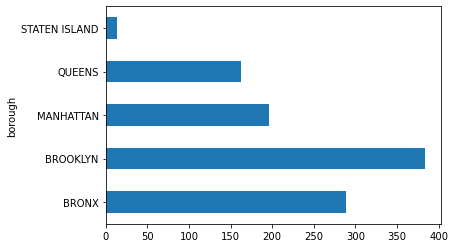

In [14]:
import matplotlib.pyplot as plt

# Create query to get hpd311calls records about safety
query = """
SELECT *
  FROM hpd311calls
 WHERE complaint_type = 'SAFETY';
"""

# Query the database and assign result to safety_calls
safety_calls = pd.read_sql(query, engine)

# Graph the number of safety calls by borough
call_counts = safety_calls.groupby('borough').unique_key.count()
call_counts.plot.barh()
plt.show()

*Filtering data before importing can help you focus on specific records, but it can also be used as a data cleaning technique to exclude records with known errors or missing values.*

## Filtering on multiple conditions
So far, you've selectively imported records that met a single condition, but it's also common to filter datasets on multiple criteria. In this exercise, you'll do just that.

The `weather` table contains daily high and low temperatures and precipitation amounts for New York City. Let's focus on inclement weather, where there was either an inch or more of snow or the high was at or below freezing (32° Fahrenheit). To do this, you'll need to build a query that uses the `OR` operator to look at values in both columns.

- Create a query that selects records in `weather` where `tmax` is less than or equal to 32 degrees `OR` `snow` is greater than or equal to 1 inch.
- Use `read_sql()` to query the database and assign the result to the variable `wintry_days`.
- View summary statistics with the `describe()` method to make sure all records in the data frame meet the given criteria.

In [15]:
# Create query for records with max temps <= 32 or snow >= 1
query = """
SELECT *
  FROM weather
 WHERE tmax <= 32
    OR snow >= 1;
"""

# Query database and assign result to wintry_days
wintry_days = pd.read_sql(query, engine)

# View summary stats about the temperatures
print(wintry_days.describe())

           latitude     longitude     elevation       awnd      prcp  \
count  2.500000e+01  2.500000e+01  2.500000e+01  25.000000  25.00000   
mean   4.077898e+01 -7.396925e+01  4.270000e+01   7.739600   0.17600   
std    2.175584e-14  4.351168e-14  1.450389e-14   2.621778   0.36947   
min    4.077898e+01 -7.396925e+01  4.270000e+01   3.130000   0.00000   
25%    4.077898e+01 -7.396925e+01  4.270000e+01   5.820000   0.00000   
50%    4.077898e+01 -7.396925e+01  4.270000e+01   7.830000   0.00000   
75%    4.077898e+01 -7.396925e+01  4.270000e+01   9.170000   0.09000   
max    4.077898e+01 -7.396925e+01  4.270000e+01  12.970000   1.41000   

            snow       tmax       tmin  
count  25.000000  25.000000  25.000000  
mean    1.332000  27.320000  17.160000  
std     2.685256   7.122266   7.673982  
min     0.000000  13.000000   5.000000  
25%     0.000000  22.000000  11.000000  
50%     0.000000  28.000000  17.000000  
75%     1.200000  31.000000  20.000000  
max     9.800000  40.00

*`SELECT` statements can use multiple `AND` and `OR` operators to filter data. Like arithmetic, you can control the order of operations with parentheses.*

---
## More complex SQL queries
The SQL we've used so far mimics the functionality of `pandas` keyword arguments like `usecols` and `skiprows`. In this lesson, we'll take advantage of SQL's features to wrangle data in ways that cannot be done at the import stage using pandas alone.

### Getting DISTINCT Values
In an analysis, you might need unique values in a column, or unique combinations of values across several columns. Examples include getting unique values to check data quality and creating crosswalks between values to combine datasets. Alternatively, data might have duplicate records that should be excluded. Pandas has tools to do this wrangling in data frames, but it can be done with SQL during import using select distinct. The syntax is "select distinct column names from table". To remove duplicate records, select distinct on all columns with the query "select distinct star from table". For another example, if we wanted to map buildings with housing complaints, we could use the query "select distinct incident address, borough from hpd311calls" to get unique street addresses and boroughs.

```sql
/* Get unique street addresses and boroughs */
SELECT DISTINCT incident_address, borough
  FROM hpd311calls;
```



### Aggregate Functions
Other times, you might not be interested in the details of individual records, particularly when visualizing data. You can query the database directly for descriptive statistics with aggregate functions like sum, average, max, min, and count.

The first four functions all take a single column name in parentheses. For example, the query "select average t max from weather", with tmax in parentheses, returns the average daily high temperature. Count is a little different. While it can accept a single column name, you can do things like get the number of rows that fit a query with count star, or even get the number of unique values in a column with count distinct and the column name.

### GROUP BY
Aggregate functions return a single number on their own. More likely, you want data summarized by categories, such as average high temperatures by month or counts of plumbing complaints by borough. In that case, add a group by clause after the select statement and where clauses. Remember to select the column you're grouping by as well as the aggregate function -- otherwise you'll end up with unlabeled summary figures for each group. The query to get counts of plumbing complaints by borough, for example, would be "select borough, count star from hpd311calls where complaint type equals plumbing, group by borough"
```sql
/* Get counts of plumbing calls by borough */
SELECT borough,
       COUNT(*)
  FROM hpd311calls
 WHERE complaint_type = 'PLUMBING'
 GROUP BY borough;
```

### Counting by Groups
Let's see what the results of that query look like in a data frame. With the necessary libraries imported, we create the engine, write out the query, then pass the query and engine to pandas' read SQL function.

When we check the results, we see we have a neat summary data frame ready for plotting.

In [16]:
# Create database engine
engine = create_engine('sqlite:///data.db')

# Write query to get plumbing call counts by borough
query = """
SELECT borough, COUNT(*)
  FROM hpd311calls
 WHERE complaint_type = 'PLUMBING'
 GROUP BY borough;
"""

# Query database and create data frame
plumbing_call_counts = pd.read_sql(query, engine)

print(plumbing_call_counts)

         borough  COUNT(*)
0          BRONX      2016
1       BROOKLYN      2702
2      MANHATTAN      1413
3         QUEENS       808
4  STATEN ISLAND       178


## Getting distinct values
Sometimes an analysis doesn't need every record, but rather unique values in one or more columns. Duplicate values can be removed after loading data into a data frame, but it can also be done at import with SQL's `DISTINCT` keyword.

Since `hpd311calls` contains data about housing issues, we would expect most records to have a borough listed. Let's test this assumption by querying unique `complaint_type`/`borough` combinations.

**Note**: The SQL checker is quite picky about column positions and expects fields to be selected in the specified order.

- Create a query that gets `DISTINCT` values for `borough` and `complaint_type` (in that order) from `hpd311calls`.
- Use `read_sql()` to load the results of the query to a data frame, `issues_and_boros`.
- Print the data frame to check if the assumption that all issues besides literature requests appear with boroughs listed.

In [17]:
# Create query for unique combinations of borough and complaint_type
query = """
SELECT DISTINCT borough, complaint_type
  FROM hpd311calls;
"""

# Load results of query to a data frame
issues_and_boros = pd.read_sql(query, engine)

# Check assumption about issues and boroughs
print(issues_and_boros)

          borough    complaint_type
0           BRONX    HEAT/HOT WATER
1       MANHATTAN          PLUMBING
2       MANHATTAN    HEAT/HOT WATER
3        BROOKLYN    HEAT/HOT WATER
4          QUEENS    HEAT/HOT WATER
..            ...               ...
60      MANHATTAN  OUTSIDE BUILDING
61      MANHATTAN          ELEVATOR
62       BROOKLYN  OUTSIDE BUILDING
63  STATEN ISLAND            SAFETY
64  STATEN ISLAND  OUTSIDE BUILDING

[65 rows x 2 columns]


*Looks like the only issues with no borough are requests for information, rather than housing complaints, which is okay. `SELECT DISTINCT` queries can be an easy way to find data quality issues like misspelled values or combinations of values that violate assumptions.*

## Counting in groups
In previous exercises, you pulled data from tables, then summarized the resulting data frames in `pandas` to create graphs. By using `COUNT` and `GROUP BY` in a SQL query, we can pull those summary figures from the database directly.

The `hpd311calls` table has a column, `complaint_type`, that categorizes call records by issue, such as heating or plumbing. In order to graph call volumes by issue, you'll write a SQL query that `COUNT`s records by complaint type.

- Create a SQL query that gets the `complaint_type` column and counts of all records from `hpd311calls`, grouped by `complaint_type`.
- Create a data frame with `read_sql()` of call counts by issue, `calls_by_issue`.
- Run the last section of code to graph the number of calls for each housing issue.

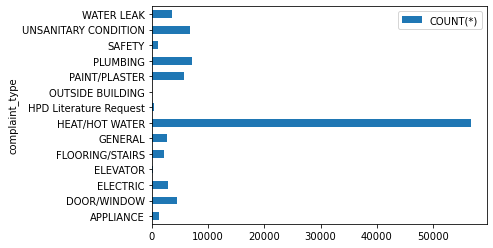

In [18]:
# Create query to get call counts by complaint_type
query = """
SELECT complaint_type, 
       COUNT(*)
  FROM hpd311calls
 GROUP BY complaint_type;
"""

# Create data frame of call counts by issue
calls_by_issue = pd.read_sql(query, engine)

# Graph the number of calls for each housing issue
calls_by_issue.plot.barh(x='complaint_type')
plt.show()

*Calls about heat and hot water issues vastly outnumber calls about all other issues. The data subset in the table comes from the winter, so this makes sense.*

## Working with aggregate functions
If a table contains data with higher granularity than is needed for an analysis, it can make sense to summarize the data with SQL aggregate functions before importing it. For example, if you have data of flood event counts by month but precipitation data by day, you may decide to `SUM` precipitation by month.

The `weather` table contains daily readings for four months. In this exercise, you'll practice summarizing weather by month with the `MAX`, `MIN`, and `SUM` functions.

- Create a query to pass to `read_sql()` that will get months and the `MAX` value of `tmax` by `month` from `weather`.

In [19]:
# Create a query to get month and max tmax by month
query = """
SELECT month, 
       MAX(tmax)
  FROM weather 
 GROUP BY month;
"""

# Get data frame of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)
0  December         61
1  February         78
2   January         61
3     March         62


- Modify the query to also get the `MIN` `tmin` value for each `month`.

In [20]:
# Create a query to get month, max tmax, and min tmin by month
query = """
SELECT month, 
	   MAX(tmax), 
       MIN(tmin)
  FROM weather 
 GROUP BY month;
"""

# Get data frame of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)  MIN(tmin)
0  December         61          9
1  February         78         16
2   January         61          5
3     March         62         27


- Modify the query to also get the total precipitation (`prcp`) for each `month`.

In [21]:
# Create query to get temperature and precipitation by month
query = """
SELECT month, 
       MAX(tmax), 
       MIN(tmin),
       SUM(prcp)
  FROM weather 
 GROUP BY month;
"""

# Get data frame of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)  MIN(tmin)  SUM(prcp)
0  December         61          9       2.21
1  February         78         16       5.83
2   January         61          5       2.18
3     March         62         27       5.17


*Aggregate functions can be a useful way to summarize large datasets. Different database management systems even have SQL functions for statistics like standard deviation and percentiles, though these are non-standard and vendor-specific.*

---
## Loading multiple tables with joins
One feature of relational databases is that tables can be linked to one another via unique record identifiers, or keys. This lets users combine tables into custom datasets with SQL joins, which we'll explore in this lesson.

### Keys
As mentioned, records typically have keys that uniquely identify them. At their simplest, keys can be automatically assigned row numbers, like in the 311 call data, but they can also carry meaning, like university course numbers. When records include other tables' keys, you can bring in, or join, data from the referenced table.

For example, given a column of instructor ID numbers and a professor table, we can then join in professors' names. When building data pipelines, this means you're not limited to working with a single table's columns.

### Joining Tables
Let's join weather data to 311 call records to study if certain problems are exacerbated by weather conditions. Both tables contain date columns as text, with unique dates in the weather table, so they'll be the join key.

First, we select star from hpd311calls to get all columns there. Star will also get all columns from weather once we join it.

Then we join weather on hpd311calls dot created date equals weather dot date, which are the key columns. We use dot notation to specify the table and column when querying multiple tables. Two things to note here: join, by default, only returns records with key values that appear in both tables. And key columns must be the same data type or nothing will match.
```sql
SELECT *
  FROM hpd311calls
  JOIN weather
    ON hpd311calls.created_date = weather.date;
```

### Joining and Filtering
We can incorporate a where clause after the join to refine the dataset. Here, we filter the data to focus on heat and hot water calls, which probably spike in cold weather.
```sql
/* Get only heat/hot water calls and join in weather data */
SELECT *
 FROM hpd311calls
 JOIN weather
   ON hpd311calls.created_date = weather.date
WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER';
```
It's even possible to summarize data and then join additional columns. Imagine we wanted to compare call counts by borough against census data about population and housing in another table, boro census. Let's build the query in parts. We first get call counts by borough by selecting `hpd311calls.borough` and count star from hpd311calls, grouping by hpd311calls dot borough. Because both tables have borough columns, we have to specify the table here.
```sql
/* Get call counts by borough */
SELECT hpd311calls.borough,
	   COUNT(*)
  FROM hpd311calls
 GROUP BY hpd311calls.borough;
```

### Joining and Aggregating
The boro census table has more columns than we need, so we also select its total population and housing units columns. Notice that we don't have to list boro census in the from clause.

Finally, we add the join clause between the from and group by clauses, joining on the borough columns.
```sql
/* Get call counts by borough
   and join in population and housing counts */
SELECT hpd311calls.borough,
       COUNT(*),
	   boro_census.total_population,
	   boro_census.housing_units
 FROM hpd311calls
      JOIN boro_census
	  ON hpd311calls.borough = boro_census.borough
GROUP BY hpd311calls.borough;
```
Let's pass this query and the database engine to read SQL and check out the results. Looks like the Bronx is overrepresented in our call data.


In [23]:
query = """
SELECT hpd311calls.borough,
       COUNT(*),
       boro_census.total_population,
       boro_census.housing_units
 FROM hpd311calls
      JOIN boro_census
      ON hpd311calls.borough = boro_census.borough
GROUP BY hpd311calls.borough;
"""

call_counts = pd.read_sql(query, engine)
print(call_counts)

         borough  COUNT(*)  total_population  housing_units
0          BRONX     29874           1455846         524488
1       BROOKLYN     31722           2635121        1028383
2      MANHATTAN     20196           1653877         872645
3         QUEENS     11384           2339280         850422
4  STATEN ISLAND      1322            475948         179179



### Review
As you can tell, SQL queries can get complicated. Let's review the order of keywords. First comes the select statement, including aggregate functions, and the table you're selecting from. Then a join clause if there is one. Then the where clause, if any. Last comes group by.

## Joining tables
Tables in relational databases usually have key columns of unique record identifiers. This lets us build pipelines that combine tables using SQL's `JOIN` operation, instead of having to combine data after importing it.

The records in `hpd311calls` often concern issues, like leaks or heating problems, that are exacerbated by weather conditions. In this exercise, you'll join `weather` data to call records along their common date columns to get everything in one data frame. You can assume these columns have the same data type.

**Note**: The SQL checker is picky about join table order -- it expects specific tables on the left and the right.

- Complete the query to join `weather` to `hpd311calls` by their `date` and `created_date` columns, respectively.
- Query the database and assign the resulting data frame to `calls_with_weather`.
- Print the first few rows of `calls_with_weather` to confirm all columns were joined.

In [24]:
# Query to join weather to call records by date columns
query = """
SELECT * 
  FROM hpd311calls
       JOIN weather 
       ON hpd311calls.created_date = weather.date;
"""

# Create data frame of joined tables
calls_with_weather = pd.read_sql(query, engine)

# View the data frame to make sure all columns were joined
print(calls_with_weather.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough      station  \
0    2786 JEROME AVENUE        07 BRONX      BRONX  USW00094728   
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN  USW00094728   
2  1235 GRAND CONCOURSE        04 BRONX      BRONX  USW00094728   
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN  USW00094728   
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN  USW00094728   

                          name  ...  longitude  elevation        date  \
0  NY CITY CENTRAL PARK, NY US  ...  -73.96925       42.7  01/01/2018   
1  NY CITY CENTRAL PARK, NY US  ...  -73.96925       42.7  0

*The joins you perform in this course only return records whose key values appear in both tables, which is why the resulting data frames have values for all columns. But there are other kinds of joins that can return records that don't have a match.*

## Joining and filtering
Just as you might not always want all the data in a single table, you might not want all columns and rows that result from a `JOIN`. In this exercise, you'll use SQL to refine a data import.

Weather exacerbates some housing problems more than others. Your task is to focus on water leak reports in `hpd311calls` and assemble a dataset that includes the day's precipitation levels from `weather` to see if there is any relationship between the two. The provided SQL gets all columns in `hpd311calls`, but you'll need to modify it to get the necessary `weather` column and filter rows with a `WHERE` clause.

- Complete `query` to get the `prcp` column in `weather` and join `weather` to `hpd311calls` on their `date` and `created_date` columns, respectively.
- Use `read_sql()` to load the results of the query into the `leak_calls` data frame.

In [25]:
# Query to get hpd311calls and precipitation values
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
       ON hpd311calls.created_date = weather.date;"""

# Load query results into the leak_calls data frame
leak_calls = pd.read_sql(query, engine)

# View the data frame
print(leak_calls.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough  prcp  
0    2786 JEROME AVENUE        07 BRONX      BRONX   0.0  
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN   0.0  
2  1235 GRAND CONCOURSE        04 BRONX      BRONX   0.0  
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN   0.0  
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN   0.0  


- Modify `query` to get only rows that have `'WATER LEAK'` as their `complaint_type`.

In [26]:
# Query to get water leak calls and daily precipitation
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
       ON hpd311calls.created_date = weather.date
 WHERE hpd311calls.complaint_type = 'WATER LEAK';"""

# Load query results into the leak_calls data frame
leak_calls = pd.read_sql(query, engine)

# View the data frame
print(leak_calls.head())

  unique_key created_date agency complaint_type incident_zip  \
0   38074305   01/01/2018    HPD     WATER LEAK        11212   
1   38078748   01/01/2018    HPD     WATER LEAK        10458   
2   38081097   01/01/2018    HPD     WATER LEAK        11221   
3   38077874   01/01/2018    HPD     WATER LEAK        11418   
4   38081110   01/01/2018    HPD     WATER LEAK        11420   

          incident_address community_board   borough  prcp  
0     1026 WILLMOHR STREET     17 BROOKLYN  BROOKLYN   0.0  
1       2700 MARION AVENUE        07 BRONX     BRONX   0.0  
2  192 MALCOLM X BOULEVARD     03 BROOKLYN  BROOKLYN   0.0  
3    129-11 JAMAICA AVENUE       09 QUEENS    QUEENS   0.0  
4        111-17 133 STREET       10 QUEENS    QUEENS   0.0  


*How you go about constructing a complicated SQL query can depend on what operators you need and how big the tables you're working with are. If your tables are very big, you may decide to filter or aggregate the data first before attempting a join.*

## oining, filtering, and aggregating
In this exercise, you'll use what you've learned to assemble a dataset to investigate how the number of heating complaints to New York City's 311 line varies with temperature.

In addition to the `hpd311calls` table, `data.db` has a `weather` table with daily high and low temperature readings for NYC. We want to get each day's count of heat/hot water calls with temperatures joined in. This can be done in one query, which we'll build in parts.

In part one, we'll get just the data we want from `hpd311calls`. Then, in part two, we'll modify the query to join in `weather` data.

- Complete the query to get `created_date` and counts of records whose `complaint_type` is `HEAT/HOT WATER` from `hpd311calls` by date.
- Create a data frame, `df`, containing the results of the query.

In [27]:
# Query to get heat/hot water call counts by created_date
query = """
SELECT hpd311calls.created_date, 
       COUNT(*)
  FROM hpd311calls 
 WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER'
 GROUP BY hpd311calls.created_date;
"""

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
print(df.head())

  created_date  COUNT(*)
0   01/01/2018      4597
1   01/02/2018      4362
2   01/03/2018      3045
3   01/04/2018      3374
4   01/05/2018      4333


- Modify the query to join `tmax` and `tmin` from the `weather` table. (There is only one record per date in `weather`, so we do not need SQL's `MAX` and `MIN` functions here.) Join the tables on `created_date` in `hpd311calls` and `date` in `weather`.

In [28]:
# Modify query to join tmax and tmin from weather by date
query = """
SELECT hpd311calls.created_date, 
	   COUNT(*), 
       weather.tmax,
       weather.tmin
  FROM hpd311calls 
  JOIN weather
       ON hpd311calls.created_date = weather.date
 WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER' 
 GROUP BY hpd311calls.created_date;
 """

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
print(df.head())

  created_date  COUNT(*)  tmax  tmin
0   01/01/2018      4597    19     7
1   01/02/2018      4362    26    13
2   01/03/2018      3045    30    16
3   01/04/2018      3374    29    19
4   01/05/2018      4333    19     9


*While SQL joins can only be used in databases, there are analagous `pandas operations to combine datasets.*